<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data Gathering

In [2]:
df = pd.read_csv('car_dataset.csv')

# Data Preparation

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Bazı değerlerimizin sayısal veri içermediğini görüyoruz.

In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Outlier değerler olabileceğine dair bir takım işaretler söz konusu

In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Eksik değerimiz bulunmuyor.

In [11]:
from datetime import datetime

# Araçların yaşını hesaplayalım

df['Age'] = datetime.now().year - df['Year']    
df.drop('Year',axis = 1, inplace = True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [12]:
# Bazı kategorik değişkenler ile dummies fonksiyonu

col_encode = ["Fuel_Type","Seller_Type","Transmission"]
encoded = pd.get_dummies(df[col_encode])
df = df.join(encoded).drop(col_encode, axis=1)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,sx4,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,ciaz,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,wagon r,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,swift,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


<AxesSubplot:>

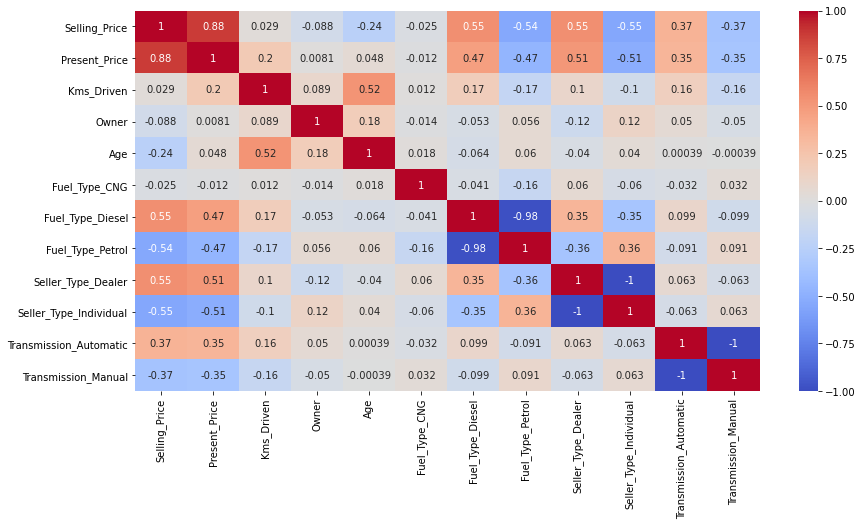

In [13]:
plt.figure(figsize=(14,7)) 
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

### Splitting data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(["Selling_Price","Car_Name"], axis =1)
y = df["Selling_Price"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

##  Model Building (Linear Regression)

In [17]:
# importing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

scores = []
lreg = LinearRegression()

In [18]:
lreg.fit(X_train, y_train)

LinearRegression()

In [19]:
lreg.score(X_train, y_train)

0.8828030918602584

Bağımsız değişkenlerimiz ile %88 oranında bağımlı değişkenimize açıklama getirebiliyoruz

In [20]:
lreg.intercept_

4.747501189723506

B0 katsayısı: 4.75

In [21]:
lreg.coef_

array([ 4.17000613e-01, -4.43708289e-06, -1.03027593e+00, -3.55835827e-01,
       -1.14306103e+00,  1.56876893e+00, -4.25707901e-01,  5.76047893e-01,
       -5.76047893e-01,  7.19179508e-01, -7.19179508e-01])

Diğer katsayıarımız

In [22]:
y_pred = lreg.predict(X_test)
y_pred

array([ 2.81694613,  8.0219717 ,  6.62419684, -1.47967587,  8.9148687 ,
        7.56978311,  1.38917767,  0.86717897,  1.41044792,  7.63177508,
        9.19555785,  0.64644643,  8.08030103,  3.2484837 ,  7.04658891,
        3.08477422,  0.50276806, 10.48960716,  1.790244  ,  2.35595178,
        0.43104472,  8.22753486,  6.74700642,  2.6123948 ,  0.83761863,
        3.65227549,  5.20869408,  2.81058233,  2.16740557,  1.79302018,
        0.43706542,  9.24076007, -0.61127887,  2.27699949,  8.70260141,
        4.45151727,  7.13407408,  7.39391401,  2.91857092,  7.77380479,
        3.86541561,  4.11807969,  4.27231023,  0.68712811,  7.48017157,
        0.53829335,  7.18097683, 10.86798394,  3.11706539,  5.57073621,
        6.5295263 ,  2.19802144, 20.26328169, 16.70924352,  7.68557671,
        9.37259627,  4.40061883,  9.0803589 ,  1.78645146,  7.31552873,
        0.28862714, -2.43218949,  1.98384337, -1.49297453,  4.71951589,
        1.83428505, 19.93406836, 18.06338799,  5.34629227, -0.53

# Interpret the model

In [23]:
my_dict = {"Actual": y_test,"Pred":y_pred,"Residual":y_test-y_pred}

In [24]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.35,2.816946,-2.466946
289,10.11,8.021972,2.088028
228,4.95,6.624197,-1.674197
198,0.15,-1.479676,1.629676
60,6.95,8.914869,-1.964869
...,...,...,...
119,1.05,0.948220,0.101780
19,2.65,3.408251,-0.758251
181,0.30,1.225693,-0.925693
79,14.50,16.778463,-2.278463


# Model Evaluation

# Regularization

In [25]:
def get_model_name(model):
    ' return name of model (class) as a string '
    return str(model.__class__).split('.')[-1][:-2]


In [26]:
def eval_metrics(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import Lasso, Ridge, ElasticNet, ElasticNetCV
    from sklearn import metrics

    models = [LinearRegression(),
              Lasso(), #L1 regularized; C=1.0 
              Ridge(), # L2 regularized; C=1.0
              ElasticNet()]

    for model in models:
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        print(get_model_name(model),
              "\n----------------------------------------",
              "\nTrain r2_score:", metrics.r2_score(y_train, train_preds),
              "\n Test r2_score:", metrics.r2_score(y_test, test_preds),
              "\n----------------------------------------",
              "\nTrain MAE:", metrics.mean_absolute_error(y_train, train_preds),
              "\n Test MAE:", metrics.mean_absolute_error(y_test, test_preds),
              "\n----------------------------------------",
              "\nTrain MSE:", metrics.mean_squared_error(y_train, train_preds),
              "\n Test MSE:", metrics.mean_squared_error(y_test, test_preds),
              "\n----------------------------------------",
              "\nTrain RMSE:", np.sqrt(mean_squared_error(y_train, train_preds)),
              "\n Test RMSE:", np.sqrt(mean_squared_error(y_test, test_preds)),
             "\n******************************************")


In [27]:
eval_metrics(X_train,X_test,y_train,y_test)

LinearRegression 
---------------------------------------- 
Train r2_score: 0.8828030918602584 
 Test r2_score: 0.8756155246205006 
---------------------------------------- 
Train MAE: 1.1469806810384877 
 Test MAE: 1.2698356709065468 
---------------------------------------- 
Train MSE: 2.8763210780593242 
 Test MSE: 3.5417485009491743 
---------------------------------------- 
Train RMSE: 1.695972015706428 
 Test RMSE: 1.8819533737447307 
******************************************
Lasso 
---------------------------------------- 
Train r2_score: 0.8356655353955402 
 Test r2_score: 0.8396213226588947 
---------------------------------------- 
Train MAE: 1.2307767938688992 
 Test MAE: 1.4566939725768333 
---------------------------------------- 
Train MSE: 4.03320097685338 
 Test MSE: 4.566654627308021 
---------------------------------------- 
Train RMSE: 2.0082830918108585 
 Test RMSE: 2.1369732397266983 
******************************************
Ridge 
------------------------------

# Ridge

# Lasso

## Elastic-Net 